![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Matematyczne fundamenty informatyki </h1>
<h2> 05. <i>Rozkłady macierzy</i>  [wykład]</h2> 
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)

**Opis treści kształcenia modułu zajęć/przedmiotu**

1. Opis faktoryzacji macierzy metodą Cholesky’ego wraz z opisem algorytmu.
2. Opis metody diagonalizacji macierzy symetrycznych.
3. Wprowadzenie do rozkładu macierzy metodą SVD i porównanie z innymi metodami.
4. Implementacja wybranych rozkładów (SVD, Cholesky, diagonalizacja) z wykorzystaniem opisu algorytmów z wykładu. 
5. Porównanie i dyskusja szybkości wybranych metod oraz wskazanie niestabilności numerycznej wybranych algorytmów.

**Efekty uczenia**

Student:
1. Potrafi dokonać rozkładu macierzy (Choleskiego, Singular Value Decomposition).

# Rozkład Choleskiego

**Twierdzenie**

Niech $A$ będzie macierzą symetryczną. Wówczas macierz $A$ jest (pół)dodatnio określona wtedy i tylko wtedy, 
gdy istnieje macierz dolnotrójkątna $L$, której elementy na przekątnej są (nieujemne)dodatnie oraz

$$A=LL^{T}.$$

Gdy $A$ jest dodatnio określona, wówczas $L$ jest jedyna, ponadto $L$ jest macierzą rzeczywistą, gdy $A$ jest macierzą rzeczywistą.

Znaczenie twierdzenia Cholesky'ego wynika z faktu, że rozwiązanie układu równań

$$Ax=b$$

odbywa się przy zadanym rozkładzie w dwóch krokach:

1. $Ly=b$ jest bezpośrednim odczytaniem rozwiązań.
2. $L^{T}x=y$ jest bezpośrednim odczytaniem rozwiązań.

---

**Zadanie**

Rozwiąż rozkłądem Choleskiego układ równań:

$$Ax = b$$

gdzie $$A=\left(\begin{array}{rr}
6 & 11 \\
11 & 26
\end{array}\right)$$

oraz $$b=(1,2)$$

---

In [1]:
A=matrix(2,2,[6,11,11,26])

In [2]:
L=matrix(2,2,[sqrt(6),0,11/sqrt(6),sqrt(35/6)])

In [3]:
L*L.transpose()==M

True

In [7]:
b=vector([1,2])
y=L.solve_right(b)
(L.transpose()).solve_right(y)

(4/35, 1/35)

In [8]:
M.solve_right(b)

(4/35, 1/35)

Wadą rozkładu Choleskiego jest konieczność wykonywania pierwiastkowań

In [11]:
pretty_print(L)

[     sqrt(6)            0]
[11/6*sqrt(6)   sqrt(35/6)]

W szczególności, gdy macierz ma wyznacznik blisku zeru, prowadzi to do niestabilności numerycznej. Przykładowo, rozkład Choleskiego $LL^{T}$ dla macierzy

$$\left(\begin{array}{rr}
1 & 1 \\
1 & e + 1
\end{array}\right)$$

zadany jest przez macierz

$$L=\left(\begin{array}{rr}
1 & 0 \\
1 & \sqrt{e}
\end{array}\right)$$

Gdy wartość $e$ fluktuuje blisko $0$ pojawia się niestabilność numeryczna.


W takich przypadkach stosuje się uogólniony rozkład $LDL^{T}$, gdzie macierz $L$ ma na przekątnej same jedynki, a macierz $D$ jest diagonalna. W poprzednim przykładzie mamy wówczas:

$$\left(\begin{array}{rr}
1 & 1 \\
1 & e + 1
\end{array}\right) = \left(\begin{array}{rr}
1 & 0 \\
1 & 1
\end{array}\right)\cdot \left(\begin{array}{rr}
1 & 0 \\
0 & e
\end{array}\right)\cdot \left(\begin{array}{rr}
1 & 1 \\
0 & 1
\end{array}\right)$$

W szczególności unikamy pierwiastkowania oraz niestabilności numerycznej.

Atrakcyjną cechą rozkładu Choleskiego jest możliwość szybkiego jego wyznaczania za pomocą metody iteracyjnej.

In [137]:
def RozkladLDLT(A):
    ldod=0
    lmno=0
    ldziel=0
    N=A.dimensions()[0]
    R=A.base_ring()
    D=[R(0)]*N
    L=matrix(R,N,N,[R(0)]*N^2)
    for i in range(0,N):
        L[i,i]=R(1)
    for i in range(0,N):
        D[i]=A[i,i]-sum([L[i,k]^2*D[k] for k in range(0,i)])
        ldod+=i
        lmno+=2*i
        for j in range(i+1,N):
            L[j,i]=(A[j,i]-sum([L[j,k]*L[i,k]*D[k] for k in range(0,i)]))/D[i]
            ldod+=i
            lmno+=2*i
            ldziel+=1
    return L,D,[ldod,lmno,ldziel]

Z podsumowania liczby operacji wynika, że liczba mnożeń+dzieleń potrzebnych do wykonania rozkładu $LDL^{T}$ wynosi mniej więcej $N^3/3$, gdzie $N$ jest wymiarem macierzy. Jest to porównywalne z metodą eliminacji Gaussa-Jordana. 

Z drugiej strony jednak, przy rozkładzie Choleskiego, potrzebujemy tylko $2N^2$ operacji, aby rozwiazać układ równań liniowych, tymczasem bez tego rozkładu, przy zmiennym wektorze $b$ potrzebujemy na ogół $N^3/3$ operacji. Zatem rozkład Choleskiego <b>przyspiesza</b> rozwiązywanie układów równań.

In [154]:
N=90
m=matrix(QQ,N,N,range(0,N^2))
M=m*m.transpose()+identity_matrix(N)
L,D,stat=RozkladLDLT(M)
(stat[1]+stat[2]*1.0)/(N^3/3)


1.01635802469136

In [167]:
a11,a12,a13,a21,a22,a23,a31,a32,a33=var('a11,a12,a13,a21,a22,a23,a31,a32,a33')
M=matrix(3,3,[a11,a12,a13,a21,a22,a23,a31,a32,a33])
L,D,_=RozkladLDLT(M)
pretty_print("L = ",L.factor())
pretty_print("D = ",diagonal_matrix([d.factor() for d in D]))

'L = ' [                                    1                                     0                                     0]
[                              a21/a11                                     1                                     0]
[                              a31/a11 (a21*a31 - a11*a32)/(a21^2 - a11*a22)                                     1]

'D = ' [                                                                                a11                                                                                   0                                                                                   0]
[                                                                                  0                                                              -(a21^2 - a11*a22)/a11                                                                                   0]
[                                                                                  0                                                                                   0 (a22*a31^2 - 2*a21*a31*a32 + a11*a32^2 + a21^2*a33 - a11*a22*a33)/(a21^2 - a11*a22)]

Rozkład Choleskiego przydaje się przy korelowaniu nieskorelowanych zmiennych losowych o zadanym rozkładzie. Wystarczy zastosować macierz $L$ na wektorze zmiennych nieskorelowanych, gdzie $M=LL^{T}$ jest macierzą kowariancji.

Niech $X_1$, $X_2$ będą niezależnymi zmiennymi losowymi o wartościach $\{-1,1\}$ i rozkłądzie jednostajnym. Mamy $EX_{i}=0$ oraz $E(X_1 X_2) = 0$, $E(X_i^2)=1$.

Chcemy uzyskać zmienne losowe o kowariancji

$$C=\left(\begin{array}{rr}
1 & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2}
\end{array}\right)$$

Wówczas z rozkładu $C=LDL^{T}$ otrzymamy $C=(LD^{1/2})(LD^{1/2})^{T}$.

Skorelowane zmienne losowe odpowiadają $(LD^{1/2})(X_1,X_2)^{T}$, są równe zatem $(X_1,(X_1+X_2)/2)$.

In [186]:
L,D,_=RozkladLDLT(matrix(QQ,2,2,[1,1/2,1/2,1/2]))
LL=L*diagonal_matrix([sqrt(x) for x in D])
LL

[  1   0]
[1/2 1/2]

In [227]:
def E(a,b,c,d,N):
    EE=0
    for _ in range(0,N):
        x1=choice([-1,1])
        x2=choice([-1,1])
        v=a*x1+b*x2
        w=c*x1+d*x2
        EE+=v*w
    return EE/N*1.0
N=10^3
matrix(2,2,[E(1,0,1,0,N),E(1,0,1/2,1/2,N),E(1/2,1/2,1,0,N),E(1/2,1/2,1/2,1/2,N)])

[ 1.00000000000000 0.471000000000000]
[0.505000000000000 0.490000000000000]

# Rozkład SVD

Gdy macierz rzeczywista kwadratowa $A$ jest symetryczna ($A=A^{T}$), wówczas istnieje ortonormalna baza wektorów własnych, a ponadto wartości własne są rzeczywiste. Gdy macierz $A$ jest dodatnio określona są one wszystkie dodatnie. W szczególności istnieje rozkład

$$A=P\Sigma P^{T}$$

gdzie $PP^{T}=I$ oraz $\Sigma=\textrm{diag}(\lambda_{1},\ldots,\lambda_{n})$,

$$\lambda_{1}\geq \ldots\geq \lambda_{n}$$

Czy istnieje analogiczne twierdzenie dla macierzy $A$, które nie są kwadratowe?

W rozkładzie własnym kluczowe jest istnienie par $(\lambda,v)$ spełniających

$$Av=\lambda v.$$

W szczególności, gdy $A=A^{T}$, zachodzi $A^{T}v=\lambda v = A v$.

W rozkładzie według wartości osobliwych (SVD=Singular Value Decomposition) poszukujemy trójek $(\sigma,u,v)$

$$Av=\sigma u,\quad A^{T}u=\sigma v$$

**Twierdzenie**

Dla dowolnej macierzy rzeczywistej $A$ o wymiarach $m\times n$ istnieje macierz ortogonalna $U$ o wymiarze $m$, macierz $\Sigma$ o wymiarach $m\times n$ i nieujemnych liczbach na przekątnej oraz macierz ortogonalna $V$ o wymiarze $n$ spełniające

$$A=U\Sigma V^{T}$$

---

**Zadanie**

Znajdź rozkład SVD macierzy

$$\left(\begin{array}{rrrr}
1 & 2 & 3 & 4 \\
0 & 1 & 2 & 0 \\
1 & 1 & 2 & 3
\end{array}\right)$$

---

In [247]:
import numpy as np
m=matrix(CDF,3,4,[1,2,3,4,0,1,2,0,1,1,2,3])
M=np.array(m)
u,s,vt=np.linalg.svd(M)
U=matrix(u)
smat=np.zeros(M.shape)
smat[:s.shape[0],:s.shape[0]]=np.diag(s)
S=matrix(smat)
V=matrix(vt).transpose()

[    0.9999999999999998  4.163336342344337e-17 1.6653345369377348e-16]
[ 4.163336342344337e-17     1.0000000000000002                    0.0]
[1.6653345369377348e-16                    0.0     0.9999999999999998]

In [ ]:
print(U*U.transpose())

In [248]:
print(V*V.transpose())

[     0.9999999999999997  -5.551115123125783e-17  -8.326672684688674e-17  -4.440892098500626e-16]
[ -5.551115123125783e-17      0.9999999999999998  -8.326672684688674e-17 -1.3877787807814457e-16]
[ -8.326672684688674e-17  -8.326672684688674e-17      0.9999999999999997 -2.7755575615628914e-16]
[ -4.440892098500626e-16 -1.3877787807814457e-16 -2.7755575615628914e-16      0.9999999999999996]


In [249]:
print(S)

[  6.849539958289331                 0.0                 0.0                 0.0]
[                0.0   1.725219913542982                 0.0                 0.0]
[                0.0                 0.0 0.32774778368821017                 0.0]


In [246]:
np.allclose(U*S*V.transpose(),M)

True

Geometryczny sens rozkładu SVD opiera się na obserwacji, że macierz $V$ odpowiada uogólnionemu obrotowi układu współrzędnych,macierz $\Sigma$ jest operacją skalowania w nowej bazie, a macierz $U$ jest ponownie uogólnionym obrotem.

Gdy uporządkujemy wartości osobliwe według rozmiaru $(\sigma_{1}\geq\sigma_{2}\geq\ldots)$ wówczas zachodzą następujące własności:

1. $\max_{||x||\neq 0} \frac{||Ax||}{||x||} = \sigma_{1}$
2. $\widehat{A}(k)=\sum_{i=1}^{k}\sigma_{i} u_{i} v_{i}^{T}$ i $\widehat{A}(k)=A$ dla wszystkich $k\geq\textrm{ranga }A$.

Ponadto $\widehat{A}(k)$ jest najlepszym (w sensie normy) przybliżeniem macierzy $A$ macierzą rangi $k$ (twierdzenie Eckarta-Younga). Ponadto zachodzi oszacowanie błędu

$$||A-\widehat{A}(k)|| = \sigma_{k+1}$$

Obliczanie rozkładu SVD dla macierzy $A$:
    
1. Wyznaczamy wektory własne dla macierzy $A^{T}A$. Baza ortonormalna tych wektorów zadaje macierz kolumn $V$.
2. Jako wartości osobliwe $\sigma_{i}$ kładziemy nieujemne pierwiastki wartości własnych $A^{T}A$.
3. Kolumny macierzy $U$ powstają poprzez wyznaczenie wektorów własnych macierzy $AA^{T}$. 

Innym sposobem jest wyznaczenie ortonormalnej bazy wektorów własnych macierzy $A^{T}A$, uzyskamy w ten sposób rozkład

$$A^{T}A=V(\Sigma^{T}\Sigma) V^{T}$$

oraz macierze $V$ i $\Sigma$. Następnie obliczamy

$$U=AV\Sigma^{-1}$$

In [267]:
m=matrix(CDF,3,4,[1,2,3,4,0,1,2,0,1,1,2,3])
M=np.array(m)
u,s,vt=np.linalg.svd(M) #można użyć opcji full_matrices=True, aby s była macierzą diagonalną, a nie listą
U=matrix(u)
smat=np.zeros(M.shape)
smat[:s.shape[0],:s.shape[0]]=np.diag(s)
S=matrix(smat)
V=matrix(vt).transpose()

In [283]:
vv=(m*m.transpose()).right_eigenvectors()
list(reversed(sorted(vv)))

[(46.91619764020217,
  [(0.7989276561258813, 0.21928399536574952, 0.5600260080153773)],
  1),
 (2.9763837500852532,
  [(-0.0728385324023974, 0.959586170577462, -0.27182518175096787)],
  1),
 (0.1074186097125396,
  [(-0.5970001243506323, 0.17637718280127743, 0.7826122545120376)],
  1)]

In [257]:
U

[  0.7989276561258813 -0.07283853240239663   0.5970001243506322]
[ 0.21928399536574927    0.959586170577462 -0.17637718280128023]
[  0.5600260080153774  -0.2718251817509687  -0.7826122545120369]

In [279]:
V

[0.19840072069316816 -0.1997795825608983 -0.5663261184337379 -0.7745966692414835]
[ 0.3470547409181892 0.31421149255601516  0.7170477516074247  -0.516397779494322]
[ 0.5774698737764217  0.6706428388423369 -0.3874274911818575  0.2581988897471607]
[ 0.7118417701394621 -0.6415586014130008 0.12254463909549168  0.2581988897471614]

In [282]:
list(reversed(sorted((m.transpose()*m).right_eigenvectors())))

[(46.91619764020227,
  [(0.19840072069316836, 0.3470547409181894, 0.5774698737764212, 0.7118417701394628)],
  1),
 (2.9763837500852577,
  [(-0.1997795825608981, 0.31421149255601527, 0.670642838842337, -0.6415586014130009)],
  1),
 (0.10741860971253357,
  [(-0.5663261184337358, 0.7170477516074262, -0.3874274911818586, 0.12254463909549115)],
  1),
 (-8.701578760168631e-16,
  [(0.774596669241476, 0.5163977794943319, -0.2581988897471665, -0.25819888974715904)],
  1)]

## Wydajne obliczenia

Do wydajnego obliczania rozkładu SVD, rozkładu QR, Choleskiego itd. wykorzystuje się powszechnie bardzo wydajną bibliotekę [LAPACK](https://en.wikipedia.org/wiki/LAPACK) (Linear Algebra Package) napisaną w Fortranie. Biblioteka ta jest rozwijana od lat 1992 do dziś i wykorzystuje najnowsze odkrycia w dziedzinie optymalizacji algorytmów algebry liniowej oraz wydajnego wykorzystania instrukcji procesorowych.

Rozkład SVD może być wykorzystany do:

* efektywnej kompresji dużych zbiorów danych. Przykładowo, stosując rozkład można odwzorować obraz z dużą wiernością (kompresja stratna). 

* Można również wykorzystać SVD do [analizy składowych głównych](https://en.wikipedia.org/wiki/Principal_component_analysis), [PCA Guide](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca) 

---

**Zadanie**

Zapisz poniższy obraz kota (Kot; Autor: GidonPico; Źródło: [Pixabay](https://pixabay.com/pl/photos/kot-%C5%9Bmieszny-kot-%C5%82adny-kot-uroczy-4262034/); Licencja: domena publiczna) w odcieniach szarości ze współczynnikiem kompresji danych powyżej 90%.
    
![Kot; Autor: GidonPico; Źródło: [Pixabay](https://pixabay.com/pl/photos/kot-%C5%9Bmieszny-kot-%C5%82adny-kot-uroczy-4262034/); Licencja: domena publiczna](figs/cat2.png)

---

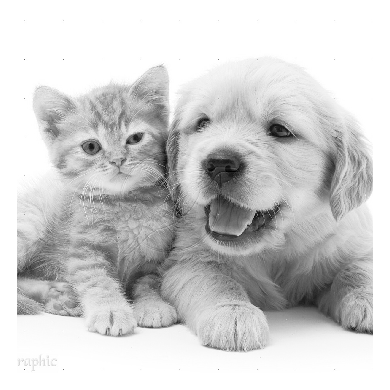

In [2]:
import numpy as np
import matplotlib.pyplot as py
arr=py.imread('image3.jpg')

#konwersja na odcienie szarości
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [-1,-1,0])

matrix_plot(rgb2gray(arr),frame=False)

In [3]:
cat=rgb2gray(arr)
# obliczenie k-tej redukcji macierzy A

def RozkladSVD(arr):
    M=np.array(arr)
    #rozkład SVD macierzy obrazu
    u,s,v=np.linalg.svd(M)
    return u,s,v

def ObrazRed(iteracje,u,s,v):
    Ali=[]
    uli=list(u.transpose())
    vli=list(v)
    Ms=u.shape[0]
    Ns=v.shape[0]
    Appr=np.zeros((Ms,Ns))
    for i in range(0,iteracje):
        ui=np.matrix(uli[i]).transpose()
        vi=np.matrix(vli[i])
        Ali.append(ui.dot(vi))
        Appr=Appr+s[i]*(ui.dot(vi))
    return Appr

graar=[]
u,s,v=RozkladSVD(cat)

In [4]:
#kompresja
def kompr(it,Ms,Ns):
    return 1-it*(Ms+Ns+1)/(Ms*Ns)*1.0

(1200, 1200)
(1200, 1200)
(1200, 1200)
(1200, 1200)
(1200, 1200)


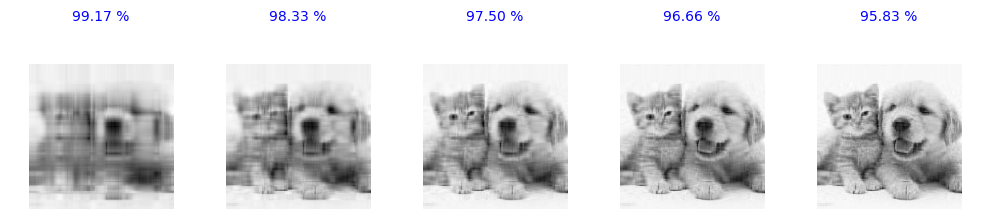

In [8]:
textli=[]
grali=[]
Ms = u.shape[0]
Ns = u.shape[0]
for k in range(1,6):
    textli+=[text(str(100*kompr(5*k,Ms,Ns).n(15))+" %",(0,-1),axes=False,aspect_ratio=0.001)]
    
    grali+=[matrix_plot(ObrazRed(5*k,u,s,v),frame=False)]
    print(ObrazRed(5*k,u,s,v).shape)
    
show(graphics_array([textli,grali]),figsize=[10,3])